**Submitted By: Zainab Anwaar**

**CMS ID: 339636**


**Task 1**

In [44]:
import pandas as pd 
import numpy as np 
from sklearn import metrics
import matplotlib.pyplot as plt 
import PIL.Image as pil
%matplotlib inline 


Using Keras MNIST Dataset

In [45]:
from tensorflow.keras.datasets import mnist


Splitting Dataset

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [47]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Normalizing the dataset

In [48]:
x_train=x_train/255
x_test=x_test/255


**Task 2**

Showing Image of 670th Sample of training data

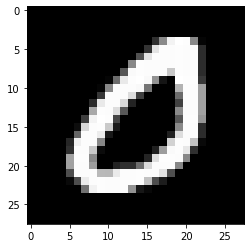

In [49]:
plt.imshow(x_train[669])


**Task 3 and 4**

Changing Dimention

In [50]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
 
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.random.randn(X.shape[1])

        for epoch in range(self.n_epochs):

            net_input = np.dot(X, self.weights)
            output = self.activation(net_input)
  
            errors = y - output
            self.weights += self.learning_rate * np.dot(X.T, errors)

    def predict(self, X):

        X = np.insert(X, 0, 1, axis=1)

        net_input = np.dot(X, self.weights)
        return self.activation(net_input)

    def activation(self, X):
        return np.where(X >= 0, 1, -1)
    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y == y_pred)
        return accuracy


**Task 5**

Training Data and Evaluating Score of the Algorithm

In [52]:
perceptron = Perceptron(learning_rate=0.001, n_epochs=100)
perceptron.fit(x_train, y_train)
predictions = perceptron.predict(x_test)
perceptron.score(x_test,y_test)

0.1135

Using Perceptron Sklearn Library

In [53]:
from sklearn.linear_model import Perceptron


sk_perceptron = Perceptron()
sk_perceptron.fit(x_train, y_train)
sk_perceptron.score(x_test, y_test)



0.8805

**Task 6**

The difference of the Perceptron model from sklearn and the Perceptron Customized class is due to the fact that our model only deals with 2 classes